# Task 2:
    
## Predictive Modeling with Linear Regression 
### Build a predictive model using linear regression to predict a numerical outcome based on one or more features. Use a dataset with a continuous target variable.

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
Training RMSE: 0.7196757085831575
Testing RMSE: 0.7455813830127761
Training R2 Score: 0.6125511913966952
Testing R2 Score: 0.5757877060324511


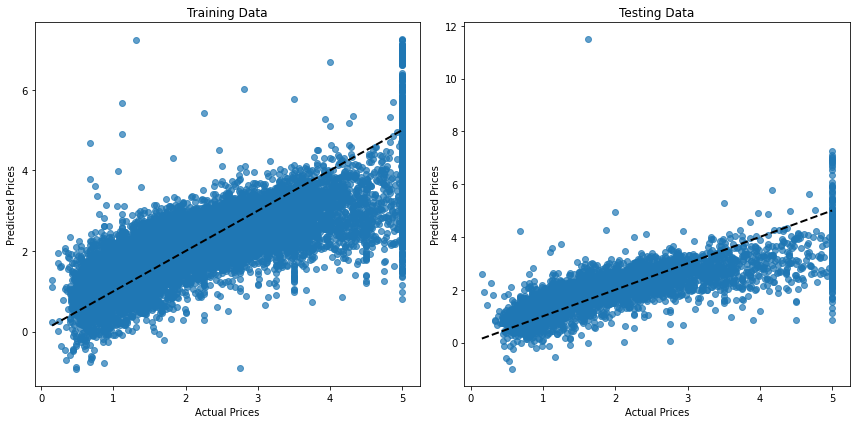

            Coefficient
MedInc         0.448675
HouseAge       0.009724
AveRooms      -0.123323
AveBedrms      0.783145
Population    -0.000002
AveOccup      -0.003526
Latitude      -0.419792
Longitude     -0.433708


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
california = fetch_california_housing(as_frame=True)
california_df = california.frame

# Display the first few rows of the dataset
print(california_df.head())

# Define the features and the target variable
X = california_df.drop(columns='MedHouseVal')
y = california_df['MedHouseVal']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')
print(f'Training R2 Score: {train_r2}')
print(f'Testing R2 Score: {test_r2}')

# Plotting the results
plt.figure(figsize=(12, 6))

# Training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Training Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)

# Testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Testing Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.tight_layout()
plt.show()

# Display the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)
